In [129]:
class peace():
    """
    This is a function to pull the most updated peace data modified from https://www.kaggle.com/kretes/gpi2008-2016
    
    Global Peace Index (GPI) measures the relative position of nations' and regions' peacefulness.
    The GPI ranks 163 independent states and territories (99.7 per cent of the world’s population)
    according to their levels of peacefulness. In the past decade, the GPI has presented trends of 
    increased global violence and less peacefulness.
    
    The lower the number indicates more peace in the region.
    """
    def __init__(self):
        import requests
        import re
        from bs4 import BeautifulSoup

    def __new__(self):
        import requests
        import re
        from bs4 import BeautifulSoup
        
        response = requests.get(url='https://en.wikipedia.org/wiki/Global_Peace_Index')
        soup = BeautifulSoup(response.text, 'html.parser')
        base_year = 2018        #latest year
        years = 9               #number of years to get data


        def get_countries_by_gpi():
            i = 1
            for table in soup.find_all('table', re.compile('wikitable sortable')):
                if table.find_all('th')[0].get_text() == 'Country\n':
                    for tr in table.find_all('tr'):
                        country_name = tr.find_all('a')[0].get_text()
                        if not country_name.startswith('['):
                            row = {'country': country_name}
                            for year, index in zip(range(base_year-years+1,base_year+1),range(2*(years),0,-2)):
                                score = tr.find_all('td')[index].get_text()
                                if score != '' and score != '\n':
                                    row['score_%s' % year] = float(score)
                            yield row

        import pandas as pd
        gpi = pd.DataFrame.from_dict(list(get_countries_by_gpi()))
        # print(gpi)
        gpi.to_csv('gpi_%s-%s.csv' % (base_year-years+1,base_year),index=False)
        gpi.columns = ['Country','pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
        return(gpi)    

In [130]:
gpi = peace()

In [135]:
gpi

,Country,pi_2010,pi_2011,pi_2012,pi_2013,pi_2014,pi_2015,pi_2016,pi_2017,pi_2018
0,Iceland,1.212,1.148,1.113,1.162,1.189,1.148,1.192,1.137,1.096
1,New Zealand,1.188,1.279,1.239,1.237,1.236,1.221,1.287,1.241,1.192
2,Austria,1.290,1.337,1.328,1.250,1.200,1.198,1.278,1.265,1.274
3,Portugal,1.366,1.453,1.470,1.467,1.425,1.344,1.356,1.258,1.318
4,Denmark,1.341,1.289,1.239,1.207,1.193,1.150,1.246,1.337,1.353
5,Canada,1.392,1.355,1.317,1.306,1.306,1.287,1.388,1.371,1.372
6,Czech Republic,1.360,1.320,1.396,1.404,1.381,1.341,1.360,1.360,1.381
7,Singapore,1.624,1.585,1.521,1.438,1.545,1.490,1.535,1.534,1.382
8,Japan,1.247,1.287,1.326,1.293,1.316,1.323,1.395,1.408,1.391
9,Ireland,1.337,1.370,1.328,1.370,1.384,1.354,1.433,1.408,1.393


In [180]:
class UNODC_crime(object):
    def __init__(self, sheet):
        """
        Crime data from UNODC including 
        'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft',
        'Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'
        or type 'ALL' to get all data.
        
        """

        import pandas as pd
        from pandas import read_excel


    def __new__(self, sheet = None):
        
#         sheet = input("Please choose crime report from the following categories\n'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft','Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'")         
        
        if sheet == "ALL":
            sheet = None
        file_path = "590PR_final_datasets"
        file_name = "data-and-metadata-from-crime-victimisation-surveys-2004-2014-xlsx-1.xlsx"
        self.dfs = pd.read_excel(file_path + "/" + file_name, sheetname = sheet, header = 12)
        
#         display(self.dfs)
#         display(self.dfs.keys())

        return self.dfs

In [87]:
burglary = UNODC_crime('Burglary')

/Users/xy/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,region_name,sub_region_name,country_name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Do data comply with this definition?,"If NO, please provide details"
0,Africa,Southern Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,4.50,5.40,NaN,4.70,NaN,NO,Definition does not explicity exclude theft fr...
1,Americas,Caribbean,Barbados,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,YES,(blank)
2,Americas,Caribbean,Jamaica,NaN,NaN,3.50,NaN,NaN,4.50,NaN,NaN,1.70,NaN,NaN,NaN,NaN
3,Americas,Caribbean,Trinidad and Tobago,NaN,NaN,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Americas,Central America,Costa Rica,NaN,NaN,NaN,NaN,10.56,NaN,9.05,NaN,NaN,NaN,6.72000,NaN,NaN
5,Americas,Central America,Mexico,NaN,NaN,NaN,NaN,NaN,1.75,1.80,4.50,4.70,5.54,NaN,SÍ,(blank)
6,Americas,Northern America,Canada,8.8,NaN,NaN,NaN,NaN,8.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Americas,Northern America,United States of America,NaN,NaN,NaN,NaN,1.93,2.00,1.94,1.90,2.10,1.93,1.67000,NaN,In last 6 months over successive interviews du...
8,Americas,South America,Bolivia (Plurinational State of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.30,NaN,5.90,NaN,NO,No se registran los intentos de robo en vivien...
9,Americas,South America,Chile,NaN,NaN,7.80,5.6,5.20,5.30,4.30,5.70,4.40,4.20,3.60000,NO,Para la ENUSC la categoría corresponde a hogar...


In [93]:
!pip install gdelt

    100% |████████████████████████████████| 778kB 11.6MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [94]:
class GDELT(object):
    def __init__(self):
        """
        The GDELT Project is the largest, most comprehensive, and highest resolution open database of human society ever created. 
        Just the 2015 data alone records nearly three quarters of a trillion emotional snapshots and more than 1.5 billion location 
        references, while its total archives span more than 215 years, making it one of the largest open-access spatio-temporal 
        datasets in existance and pushing the boundaries of "big data" study of global human society. Its Global Knowledge Graph 
        connects the world's people, organizations, locations, themes, counts, images and emotions into a single holistic network 
        over the entire planet.
        
        This is Gdelt 2.0 (supports from the date after Feb, 2015)
        This function pull the events ids and the country it takes place
        Please input the date in the format of 'yyyy mm dd'.
        
        This function use a package from https://github.com/linwoodc3/gdeltPyR
        
        """
        !pip install gdelt
        
    def __new__(self, start, end):
        import gdelt

        gd = gdelt.gdelt(version=2)
        results = gd.Search([start,end],table='events',coverage=True,translation=False)
        return (results[['GLOBALEVENTID','ActionGeo_FullName']])

In [95]:
g = GDELT("2017 10 15", "2017 10 16")

/Users/xy/anaconda3/lib/python3.6/site-packages/gdelt/parallel.py:67: UserWarning: GDELT does not have a url for date time 20171015223000
  warnings.warn(message)
/Users/xy/anaconda3/lib/python3.6/site-packages/gdelt/parallel.py:103: UserWarning: GDELT did not return data for date time 20171015223000
  warnings.warn(message)
/Users/xy/anaconda3/lib/python3.6/site-packages/gdelt/parallel.py:67: UserWarning: GDELT does not have a url for date time 20171016030000
  warnings.warn(message)
/Users/xy/anaconda3/lib/python3.6/site-packages/gdelt/parallel.py:103: UserWarning: GDELT did not return data for date time 20171016030000
  warnings.warn(message)


In [97]:
display(g.head(30))

,GLOBALEVENTID,ActionGeo_FullName
0,697958718,"Montego Bay, Saint James, Jamaica"
1,697958719,"Luverne, Minnesota, United States"
2,697958720,"Luverne, Minnesota, United States"
3,697958721,"California, United States"
4,697958722,Russia
5,697958723,Russia
6,697958724,"Kuala Lumpur, Kuala Lumpur, Malaysia"
7,697958725,"Montego Bay, Saint James, Jamaica"
8,697958726,NaN
9,697958727,NaN


In [104]:
import zipfile
import pandas as pd
class Happiness():
    def __init__(self):
        import pandas as pd
        import zipfile
    def __new__(self):
        
        file_path = "590PR_final_datasets"
        file_name = "world-happiness-report.zip"

        zf = zipfile.ZipFile(file_path + '/' + file_name) 

        df = []
        happy = {}
        for name in zipfile.ZipFile.infolist(zf):
            happy[name.filename] = pd.read_csv(zf.open(name.filename))
#             df.append(pd.read_csv(zf.open(name.filename)))
#         display(df)
#         return [df[0], df[1], df[2]]
        return happy

In [105]:
ha = Happiness()
ha.keys()

dict_keys(['2015.csv', '2016.csv', '2017.csv'])

In [106]:
class Freedom():
    def __init__(self):
        import pandas as pd
    def __new__(self):        
        file_path = "590PR_final_datasets"
        file_name = "the-human-freedom-index.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')       
        return df

In [108]:
df_freedom = Freedom()

In [109]:
df_freedom.head(30)

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
5,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
6,2016,AUT,Austria,Western Europe,8.969832,7.872188,7.673227,8.171749,9.737912,10.0,...,6.418890,7.296116,8.531578,7.419870,7.371334,7.58,27.0,8.413474,16.0,1.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,NaN,NaN,NaN,4.270861,9.143499,10.0,...,5.353533,6.959699,7.814181,7.080078,6.874880,6.49,106.0,6.083277,130.0,4.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,6.930835,6.008696,6.262840,6.400790,0.000000,10.0,...,NaN,7.981672,7.388227,7.523034,8.169125,7.34,49.0,7.397269,50.0,2.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,NaN,NaN,5.900339,9.790481,10.0,...,6.596745,8.074670,9.680534,8.018774,7.415786,7.56,30.0,6.848035,75.0,2.0


In [110]:
class Poverty():
    def __init__(self):
        import pandas as pd
        import zipfile
    def __new__(self):
        
        file_path = "590PR_final_datasets"
        file_name = "PovStats_csv.zip"

        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        pov = {}
        for name in zipfile.ZipFile.infolist(zf):
#             print(name.filename)
#             df.append(pd.read_csv(zf.open(name.filename)))
            pov[name.filename] = pd.read_csv(zf.open(name.filename))
#         display(df)
#         return [df[0], df[1], df[2]]
        return pov

In [111]:
Poverty().keys()

dict_keys(['PovStatsData.csv', 'PovStatsCountry.csv', 'PovStatsSeries.csv', 'PovStatsCountry-Series.csv', 'PovStatsFootNote.csv'])

In [112]:
class Suicide():
    def __init__(self):
        import pandas as pd
    def __new__(self):       
        file_path = "590PR_final_datasets"
        file_name = "suicide-rates-overview-1985-to-2016.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')    
        return df

In [114]:
df_suicide = Suicide()

In [115]:
df_suicide.head(30)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [122]:
class Unemployment():
    def __init__(self):
        import pandas as pd
    def __new__(self):       
        file_path = "590PR_final_datasets"
        file_name = "unemployment.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip') 
        df_need = df[df['Magnitude']=='PERCENT PER ANNU']
        return df_need

In [123]:
df_unemployment = Unemployment()

In [124]:
df_unemployment.head(30)

,OID,Country or Area,Year,Description,Magnitude,Value
0,91467R..ZF...,ALBANIA,2008,UNEMPLOYMENT RATE,PERCENT PER ANNU,12.75
4,91467R..ZF...,ALBANIA,2007,UNEMPLOYMENT RATE,PERCENT PER ANNU,13.36
8,91467R..ZF...,ALBANIA,2006,UNEMPLOYMENT RATE,PERCENT PER ANNU,13.90
12,91467R..ZF...,ALBANIA,2005,UNEMPLOYMENT RATE,PERCENT PER ANNU,14.30
16,91467R..ZF...,ALBANIA,2004,UNEMPLOYMENT RATE,PERCENT PER ANNU,14.75
20,91467R..ZF...,ALBANIA,2003,UNEMPLOYMENT RATE,PERCENT PER ANNU,15.18
24,91467R..ZF...,ALBANIA,2002,UNEMPLOYMENT RATE,PERCENT PER ANNU,15.80
28,91467R..ZF...,ALBANIA,2001,UNEMPLOYMENT RATE,PERCENT PER ANNU,16.40
32,91467R..ZF...,ALBANIA,2000,UNEMPLOYMENT RATE,PERCENT PER ANNU,16.80
36,91467R..ZF...,ALBANIA,1999,UNEMPLOYMENT RATE,PERCENT PER ANNU,18.40


In [83]:
def Hunger():
    file_path = "590PR_final_datasets"
    file_name = "Hunger.csv"
    import pandas as pd
    df_hunger = pd.read_csv(file_path + "/" + file_name, na_values = '\t', sep = '\t', header = 0)
    #display(df_hunger)
    list = []
    list.append(df_hunger['Country Name'])
    for i in range(2009, 2019):
        year = str(i)
        df = df_hunger[year]
        list.append(df)
    df_new_hunger = pd.concat(list,axis = 1)
    df_new_hunger.columns = ['Country', 'undernourishment_rate_2009','undernourishment_rate_2010',
                            'undernourishment_rate_2011','undernourishment_rate_2012',
                            'undernourishment_rate_2013','undernourishment_rate_2014',
                            'undernourishment_rate_2015','undernourishment_rate_2016',
                            'undernourishment_rate_2017','undernourishment_rate_2018']
    return df_new_hunger

In [85]:
df_new_hunger = Hunger()

In [86]:
df_new_hunger

,Country,undernourishment_rate_2009,undernourishment_rate_2010,undernourishment_rate_2011,undernourishment_rate_2012,undernourishment_rate_2013,undernourishment_rate_2014,undernourishment_rate_2015,undernourishment_rate_2016,undernourishment_rate_2017,undernourishment_rate_2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,22.900000,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN
2,Angola,42.500000,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN
3,Albania,8.400000,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,10.016621,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN
6,United Arab Emirates,6.000000,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN
7,Argentina,4.100000,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN
8,Armenia,5.300000,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
class Suicide():
    def __init__(self):

        import pandas as pd

    def __new__(self):
        
        file_path = "590PR_final_datasets"
        file_name = "suicide-rates-overview-1985-to-2016.zip"

        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        
        return df





        import pandas as pd
        import glob

        path = r'C:\DRO\DCL_rawdata_files' # use your path
        all_files = glob.glob(path + "/*.csv")
        li = []
        for filename in all_files:
            df = pd.read_csv(filename, index_col=None, header=0)
            li.append(df)
        frame = pd.concat(li, axis=0, ignore_index=True)

In [200]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def Analysis_first_two_level(df_new_hunger, gpi): 
    df_level1 = pd.merge(df_new_hunger, gpi, on = 'Country', how='inner')
    df_level1 = df_level1.drop_duplicates(keep='first', inplace=False)
    plt.figure(figsize = (30,8), dpi=100)
    x_list = []
    y_list = []
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
              ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
              ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
              ['undernourishment_rate_2016','pi_2016']]
    for i in item:
        df = df_steal[i]
        dd = df.sort_values(by=i[0], ascending=True)
        x = np.asarray(dd[i[0]])
        y = np.asarray(dd[i[1]])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_x = np.delete(x,j)
                new_y = np.delete(y,j)
        x_list.append(new_x)
        y_list.append(new_y)
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][1][-4:], marker = marker[f],color = color[f])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.ylim(0,4)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.show()

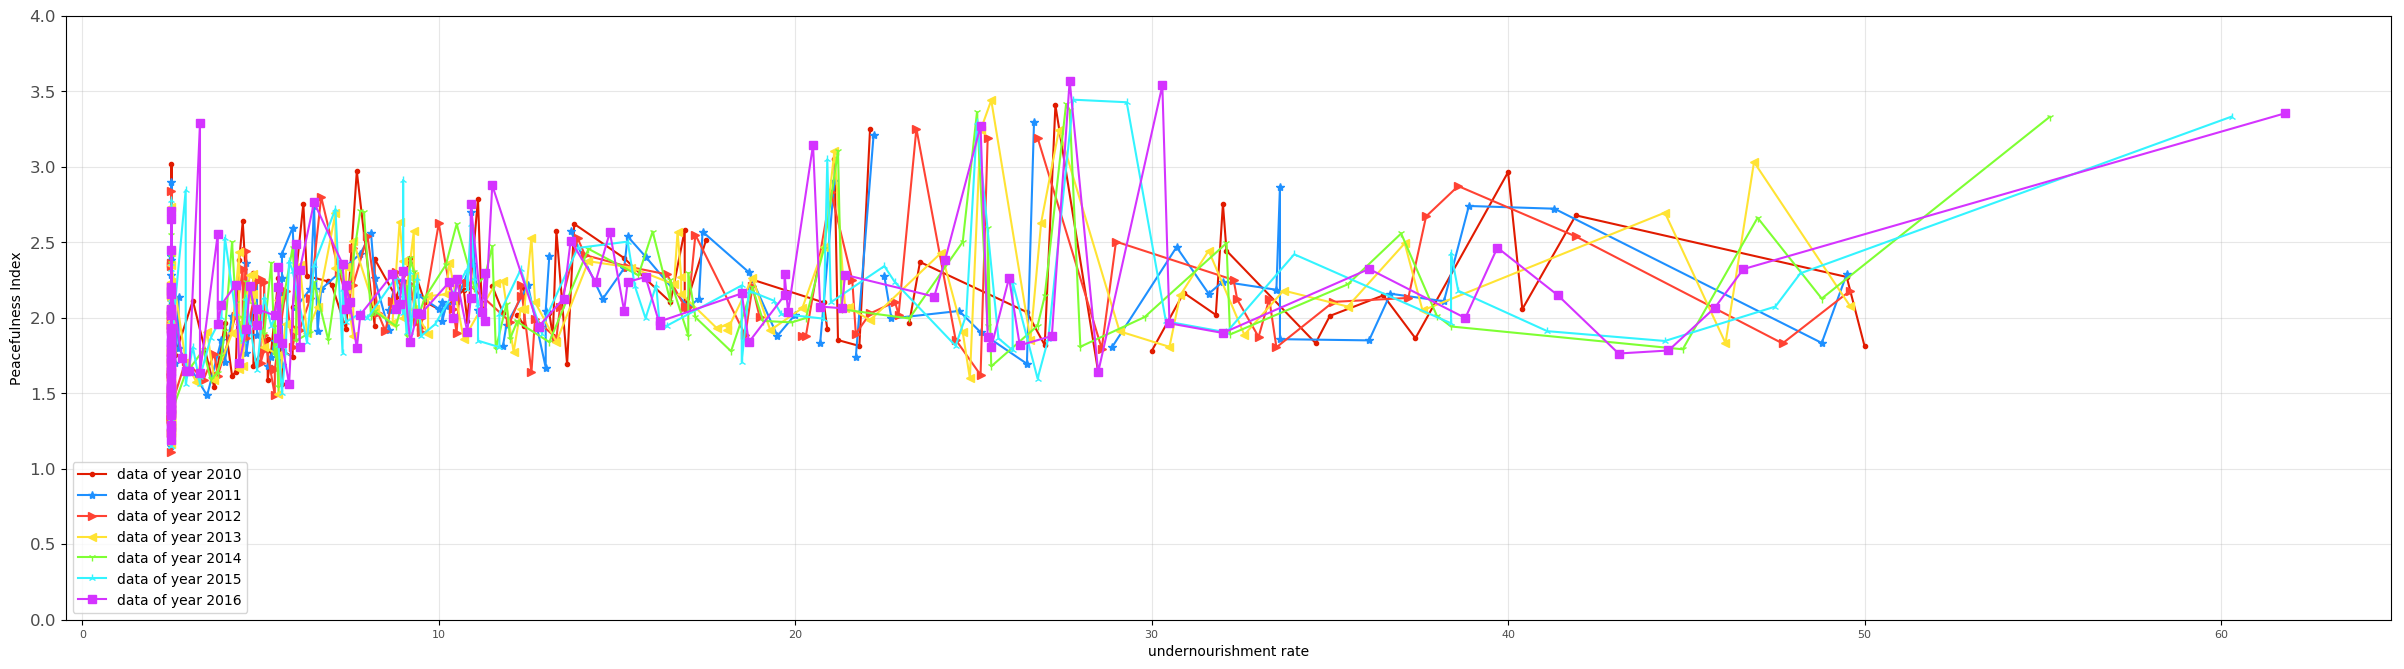

In [201]:
Analysis_first_two_level(df_new_hunger, gpi)

In [158]:
import numpy as np
x = np.asarray(df_steal['undernourishment_rate_2017'])
x.shape

(145,)

In [145]:
j = [['undernourishment_rate_2010','pi_2010'],'undernourishment_rate_2011',
              'undernourishment_rate_2012','undernourishment_rate_2013',
              'undernourishment_rate_2014','undernourishment_rate_2015','undernourishment_rate_2016']

In [159]:
df_steal.sort_values(by='undernourishment_rate_2010', ascending=True)

,Country,undernourishment_rate_2009,undernourishment_rate_2010,undernourishment_rate_2011,undernourishment_rate_2012,undernourishment_rate_2013,undernourishment_rate_2014,undernourishment_rate_2015,undernourishment_rate_2016,undernourishment_rate_2017,undernourishment_rate_2018,pi_2010,pi_2011,pi_2012,pi_2013,pi_2014,pi_2015,pi_2016,pi_2017,pi_2018
123,Sweden,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.354,1.401,1.419,1.319,1.381,1.360,1.461,1.516,1.502
79,Latvia,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.827,1.793,1.774,1.772,1.745,1.695,1.680,1.670,1.689
30,Cuba,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.964,1.964,1.951,1.922,1.986,1.988,2.057,2.056,2.037
32,Czech Republic,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.360,1.320,1.396,1.404,1.381,1.341,1.360,1.360,1.381
33,Germany,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.398,1.416,1.424,1.431,1.423,1.379,1.486,1.500,1.531
137,Uruguay,2.7,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.568,1.521,1.628,1.528,1.565,1.721,1.726,1.709,1.761
35,Denmark,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.341,1.289,1.239,1.207,1.193,1.150,1.246,1.337,1.353
78,Lithuania,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.713,1.760,1.741,1.784,1.797,1.674,1.735,1.732,1.749
72,Kuwait,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.693,1.667,1.792,1.705,1.679,1.626,1.842,1.909,1.799
40,Spain,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,NaN,1.588,1.641,1.548,1.563,1.548,1.451,1.604,1.568,1.678


In [172]:
dd = df_steal[['undernourishment_rate_2014','pi_2014']].sort_values(by='undernourishment_rate_2014', ascending=True)
x = dd['pi_2014']
x = np.asarray(x)
x

array([1.189, 1.986, 1.381, 1.423, 1.193, 2.546, 1.548, 1.745, 1.297,
       1.808, 1.384, 1.797, 1.565, 1.679, 2.137, 2.15 , 2.052, 1.316,
       1.675, 2.689, 1.548, 1.798, 2.402, 1.86 , 1.902, 1.381, 1.398,
       1.414, 1.2  , 2.365, 1.354, 1.677, 1.425, 1.532, 2.078, 1.482,
       1.475, 1.258, 1.306, 1.236, 2.073, 1.371, 1.635, 1.659, 1.789,
       1.591, 1.637, 1.748, 1.915, 2.5  , 2.097, 1.84 , 2.001, 2.239,
       2.093, 1.889, 2.364, 1.755, 2.003, 1.544, 1.939, 2.465, 2.065,
       1.849, 1.902, 2.235, 1.853, 2.35 , 2.179, 2.225, 2.71 , 2.701,
       2.013, 2.042, 1.945, 2.207, 1.877, 2.395, 2.304, 2.203, 1.989,
       2.129, 2.351, 2.62 , 2.197, 2.28 , 2.473, 1.792, 2.093, 1.861,
       1.976, 1.974, 1.839, 2.456, 2.281, 2.571, 2.106, 2.248, 1.882,
       2.296, 2.003, 1.778, 2.201, 1.979, 1.969, 1.998, 2.452, 3.107,
       2.056, 1.995, 2.502, 3.362, 1.942, 2.591, 1.678, 1.947, 2.143,
       3.416, 3.377, 1.808, 2.004, 2.494, 1.889, 2.221, 2.558, 2.014,
       1.942, 1.791,

In [169]:
s = 'pi_2010'
s[-4:]

'2010'